In [85]:
df0<-data.frame(pos=0,time=c(2.5,3.5,3.2,2.55,3.1,3.12))
df3<-data.frame(pos=3,time=c(1.8,1.28,2.5,2.3,2.4,2.04,2.5,2.2))
df4<-data.frame(pos=4,time=c(2,2.2,2.01,2.7,NA,2,2.72,1.9,2,2.05))
df8<-data.frame(pos=8,time=c(1.5,1.8,2.1,1.8,2,1.2,2,NA,1.4,2))
df_roja<-rbind(df0, df3, df4,df8)
head(df_roja)

,pos,time
,<dbl>,<dbl>
1,0,2.50
2,0,3.50
3,0,3.20
4,0,2.55
5,0,3.10
6,0,3.12


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


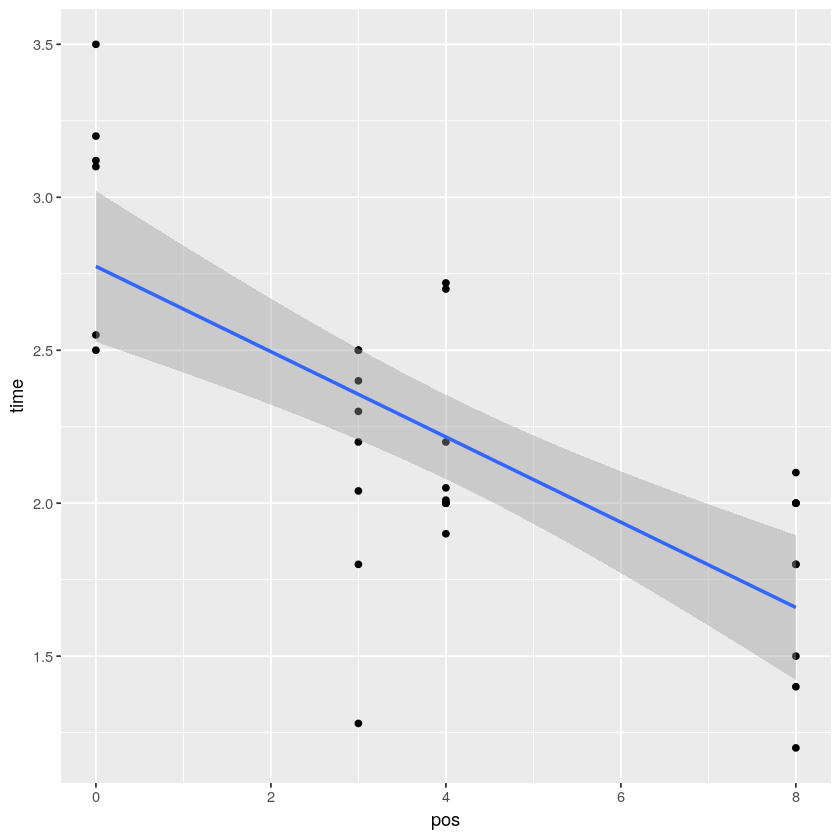

In [86]:
library(tidyverse)
ggplot(df_roja, aes(x=pos,y=time))+geom_point()+geom_smooth(method = 'lm')

In [126]:
set.seed(12)
idx<-sample(1:nrow(df_roja), nrow(df_roja)*0.7)

df_roja_train <- df_roja[idx,]
df_roja_test <- df_roja[-idx,]
summary(df_roja_train)
summary(df_roja_test)

      pos             time      
 Min.   :0.000   Min.   :1.280  
 1st Qu.:3.000   1st Qu.:2.000  
 Median :4.000   Median :2.075  
 Mean   :4.391   Mean   :2.229  
 3rd Qu.:8.000   3rd Qu.:2.500  
 Max.   :8.000   Max.   :3.500  
                 NA's   :1      

      pos             time      
 Min.   :0.000   Min.   :1.200  
 1st Qu.:3.500   1st Qu.:1.925  
 Median :4.000   Median :2.005  
 Mean   :3.909   Mean   :2.133  
 3rd Qu.:4.000   3rd Qu.:2.475  
 Max.   :8.000   Max.   :3.200  
                 NA's   :1      

In [127]:
paste("El numero de muestras en training es",nrow(df_roja_train))
paste("El numero de muestras en testing es",nrow(df_roja_test))

[1] "El numero de muestras en training es 23"

[1] "El numero de muestras en testing es 11"

In [128]:
table(df_roja_train$pos)


0 3 4 8 
4 7 4 8 

In [129]:
table(df_roja_test$pos)


0 3 4 8 
2 1 6 2 

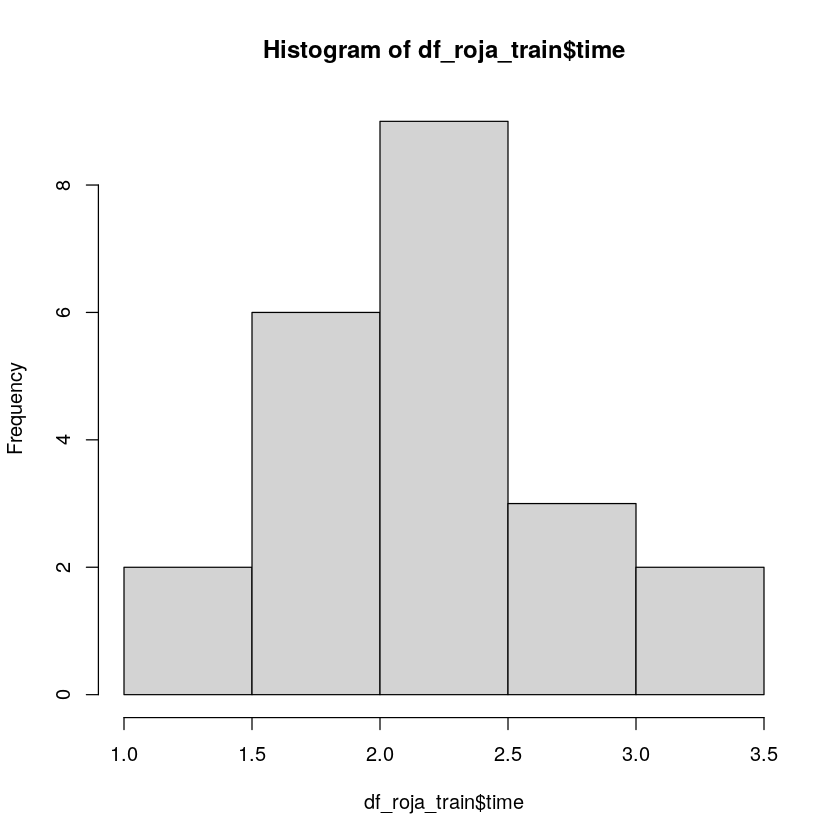

In [94]:
hist(df_roja_train$time)

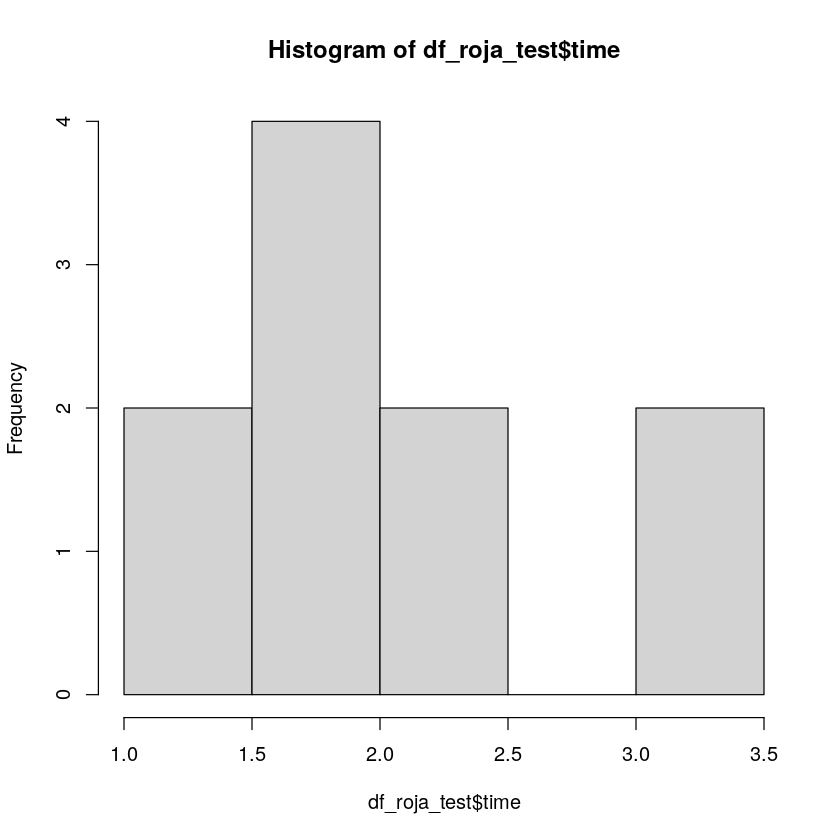

In [95]:
hist(df_roja_test$time)

### Modelo regresión lineal sencillo

In [96]:
model<-lm(df_roja_train, formula=time~pos)
summary(model)


Call:
lm(formula = time ~ pos, data = df_roja_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5624 -0.2330 -0.1124  0.2678  0.7031 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.79690    0.13640  20.505 6.71e-15 ***
pos         -0.14485    0.02881  -5.027 6.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3517 on 20 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5582,	Adjusted R-squared:  0.5361 
F-statistic: 25.27 on 1 and 20 DF,  p-value: 6.461e-05


In [97]:
confint(model)

,2.5 %,97.5 %
(Intercept),2.5123704,3.08143490
pos,-0.2049552,-0.08474273


Calculamos los residuos en testing:

In [98]:
df_roja_test

,pos,time
,<dbl>,<dbl>
3,0,3.20
6,0,3.12
8,3,1.28
12,3,2.04
13,3,2.50
20,4,2.00
25,8,1.50
26,8,1.80
31,8,2.00


In [101]:
df_mean <- df_roja_train %>% group_by(pos) %>% summarise(n=n(),mn=mean(time,na.rm=T)) 
df_mean

pos,n,mn
<dbl>,<int>,<dbl>
0,4,2.9125
3,5,2.2400
4,9,2.1975
8,5,1.7000


In [102]:
df_roja_test_with_mn<-merge(df_mean,df_roja_test,by="pos")
df_roja_test_with_mn[is.na(df_roja_test_with_mn$time),"time"]<-df_roja_test_with_mn[is.na(df_roja_test_with_mn$time),"mn"]
df_roja_test_with_mn[,c("pos","time")]

pos,time
<dbl>,<dbl>
0,3.20
0,3.12
3,1.28
3,2.04
3,2.50
4,2.00
8,1.50
8,1.80
8,2.00


In [104]:
df_roja_test_with_mn$time - predict(model,df_roja_test_with_mn)

1           2           3           4           5           6 
 0.40309735  0.32309735 -1.08235581 -0.32235581  0.13764419 -0.21750687 
          7           8           9          10          11 
-0.13811108  0.16188892  0.36188892  0.06188892  0.36188892

In [105]:
df_roja_test$pred<-predict(model,df_roja_test)
df_roja_test_no_na<-na.omit(df_roja_test)

In [106]:
df_roja_test_no_na

,pos,time,pred
,<dbl>,<dbl>,<dbl>
3,0,3.20,2.796903
6,0,3.12,2.796903
8,3,1.28,2.362356
12,3,2.04,2.362356
13,3,2.50,2.362356
20,4,2.00,2.217507
25,8,1.50,1.638111
26,8,1.80,1.638111
31,8,2.00,1.638111


In [107]:
caret::postResample(df_roja_test_no_na$pred,df_roja_test_no_na$time)

RMSE  Rsquared       MAE 
0.4376930 0.4652917 0.3509835

#### Filtrando por la distancia de cooks

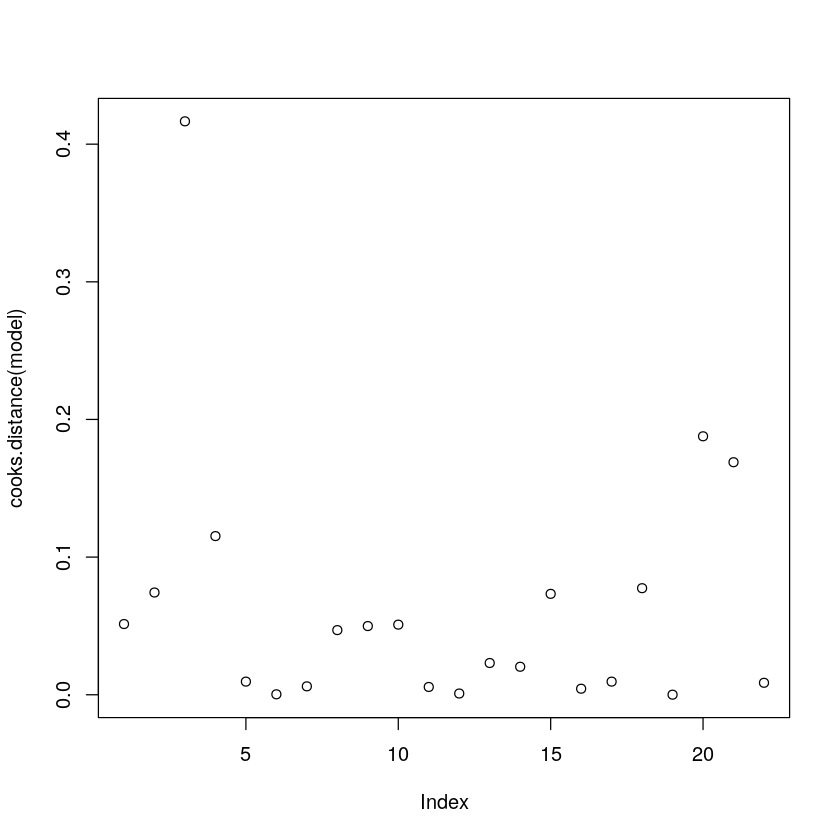

In [108]:
plot(cooks.distance(model))

In [114]:
nrow(df_roja_train)

[1] 23

In [121]:
sum(is.na(df_roja_train$time))

[1] 1

In [116]:
model_new <- lm(na.omit(df_roja_train)[cooks.distance(model)<0.15,],formula=time~pos)
summary(model_new)


Call:
lm(formula = time ~ pos, data = na.omit(df_roja_train)[cooks.distance(model) < 
    0.15, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5054 -0.1809 -0.1054  0.1446  0.5341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.66395    0.12962  20.553 1.92e-13 ***
pos         -0.11951    0.02957  -4.041 0.000848 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2953 on 17 degrees of freedom
Multiple R-squared:   0.49,	Adjusted R-squared:   0.46 
F-statistic: 16.33 on 1 and 17 DF,  p-value: 0.0008481


In [118]:
caret::postResample(predict(model_new,df_roja_test_no_na),
                    df_roja_test_no_na$time)

RMSE  Rsquared       MAE 
0.4372717 0.4652917 0.3547672

In [119]:
caret::postResample(predict(model,df_roja_test_no_na),
                    df_roja_test_no_na$time)

RMSE  Rsquared       MAE 
0.4376930 0.4652917 0.3509835

### Modelo regresión lineal polinomico

In [122]:
model_p<-lm(df_roja_train, formula=time~pos+I(pos^2))
summary(model_p)


Call:
lm(formula = time ~ pos + I(pos^2), data = df_roja_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51293 -0.22977 -0.05885  0.19808  0.60174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.898256   0.174704  16.589 9.24e-13 ***
pos         -0.222817   0.088406  -2.520   0.0208 *  
I(pos^2)     0.009236   0.009897   0.933   0.3624    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3528 on 19 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5776,	Adjusted R-squared:  0.5331 
F-statistic: 12.99 on 2 and 19 DF,  p-value: 0.0002784


In [123]:
caret::postResample(predict(model_p,df_roja_test_no_na),
                    df_roja_test_no_na$time)

RMSE  Rsquared       MAE 
0.3954687 0.5612554 0.3057512

In [132]:
df0<-data.frame(pos=0,time=c(3.5,3.2,3.2,3,3.2,3.8,3))
df2<-data.frame(pos=2,time=c(2.35,2.8,2.5,2.9,2.8,2.5,2.5,2.9,2.6,2.8))
df5<-data.frame(pos=5,time=c(2.3,2,3,2.3,2,2.2,2.1,2.3,2.1,2.2))
df6<-data.frame(pos=6,time=c(2.8,2.5,2.4,2.9,2.4,2.02,2.8,2.2,2.5,2.4))
df9<-data.frame(pos=9,time=c(1.8,1.2,1.7,2.6,1.5,1.7,1.7,1.8,1.7))


df_verde <- rbind(df0, df2, df5,df6,df9)
head(df_verde)

,pos,time
,<dbl>,<dbl>
1,0,3.5
2,0,3.2
3,0,3.2
4,0,3.0
5,0,3.2
6,0,3.8


In [135]:
df_verde$color<-"verde"
df_roja$color<-"rojo"
df_bola<-rbind(df_verde,df_roja)
df_bola$color<-as.factor(df_bola$color)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


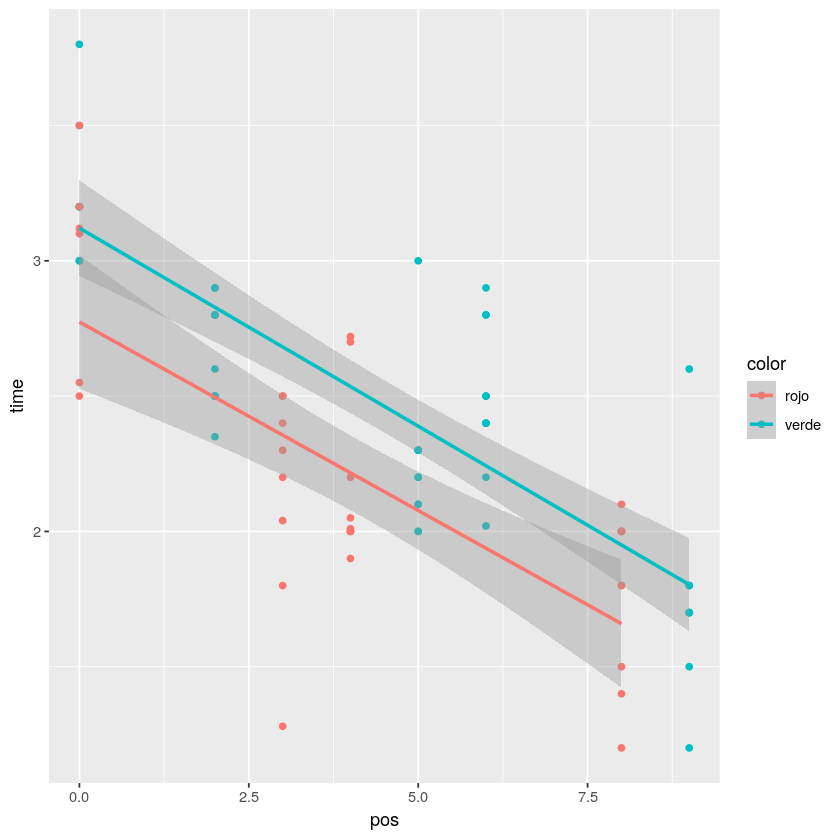

In [138]:
ggplot(df_bola,aes(x=pos,y=time,color=color))+geom_point()+geom_smooth(method='lm')

In [177]:
table(df_bola$color,df_bola$pos)

       
         0  2  3  4  5  6  8  9
  rojo   6  0  8 10  0  0 10  0
  verde  7 10  0  0 10 10  0  9

In [140]:
model_roja <-lm(df_roja, formula=time~pos)
model_verde<-lm(df_verde, formula=time~pos)

In [143]:
df_test <- data.frame(pos=1:30)
df_test$pred_roja <- predict(model_roja, df_test)
df_test$pred_verde <- predict(model_verde, df_test)

head(df_test)

,pos,pred_roja,pred_verde
,<int>,<dbl>,<dbl>
1,1,2.634621,2.974476
2,2,2.495242,2.828076
3,3,2.355864,2.681677
4,4,2.216485,2.535278
5,5,2.077106,2.388879
6,6,1.937727,2.242479


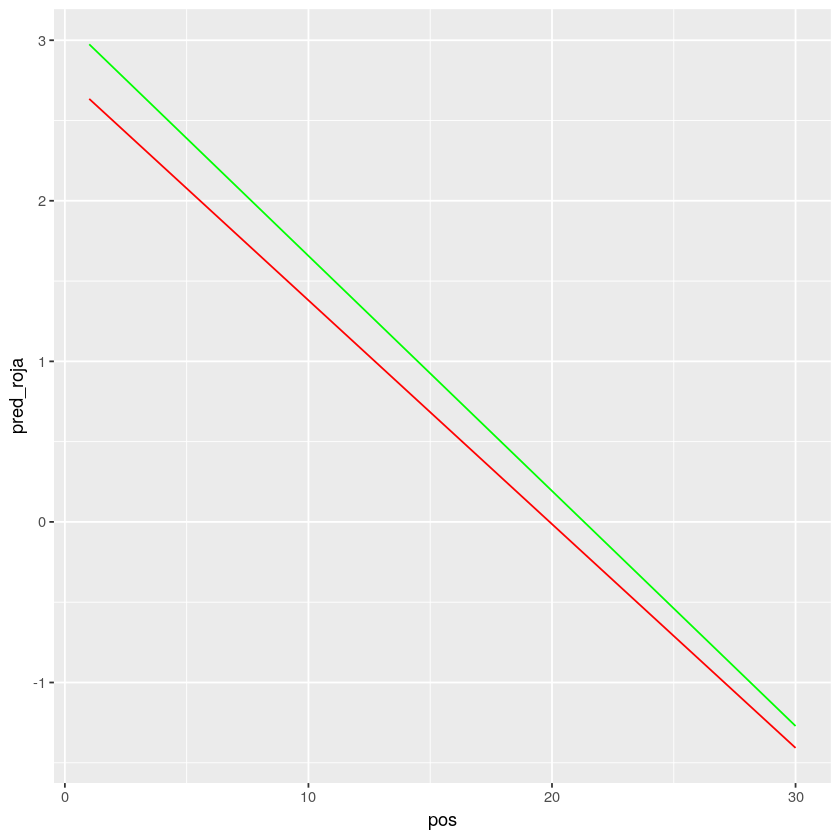

In [145]:
ggplot(df_test,aes(x=pos))+geom_line(aes(y=pred_roja),color='red')+geom_line(aes(y=pred_verde),color='green')

### Preparación del dataset

In [146]:
set.seed(12)
idx<-sample(1:nrow(df_bola), nrow(df_bola)*0.7)

df_bola_train <- df_bola[idx,]
df_bola_test <- df_bola[-idx,]
summary(df_bola_train)
summary(df_bola_test)

      pos             time         color   
 Min.   :0.000   Min.   :1.200   rojo :26  
 1st Qu.:3.000   1st Qu.:2.000   verde:30  
 Median :5.000   Median :2.300             
 Mean   :4.679   Mean   :2.284             
 3rd Qu.:6.500   3rd Qu.:2.550             
 Max.   :9.000   Max.   :3.500             
                 NA's   :1                 

      pos             time         color   
 Min.   :0.000   Min.   :1.500   rojo : 8  
 1st Qu.:2.000   1st Qu.:2.010   verde:16  
 Median :3.000   Median :2.500             
 Mean   :3.875   Mean   :2.496             
 3rd Qu.:6.000   3rd Qu.:2.850             
 Max.   :9.000   Max.   :3.800             
                 NA's   :1                 

In [148]:
paste("El numero de muestras en training es",nrow(df_bola_train))
paste("El numero de muestras en testing es",nrow(df_bola_test))

[1] "El numero de muestras en training es 56"

[1] "El numero de muestras en testing es 24"

In [149]:
table(df_bola_test$pos)


0 2 3 4 5 6 8 9 
5 5 3 1 2 3 3 2 

In [150]:
table(df_bola_test$pos)


0 2 3 4 5 6 8 9 
5 5 3 1 2 3 3 2 

### Modelos para las dos bolas

In [159]:
model_bola1<-lm(df_bola_train, formula=time~pos+color)
summary(model_bola1)


Call:
lm(formula = time ~ pos + color, data = df_bola_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08158 -0.25097 -0.05097  0.23484  0.79226 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.76900    0.10415  26.587  < 2e-16 ***
pos         -0.13581    0.01828  -7.428 1.03e-09 ***
colorverde   0.26101    0.10374   2.516    0.015 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3743 on 52 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5189,	Adjusted R-squared:  0.5004 
F-statistic: 28.05 on 2 and 52 DF,  p-value: 5.464e-09


In [161]:
df_bola_test<-na.omit(df_bola_test)
caret::postResample(predict(model_bola1, df_bola_test), df_bola_test$time)

RMSE  Rsquared       MAE 
0.2861652 0.7928292 0.2236999

In [162]:
confint(model_bola1)

,2.5 %,97.5 %
(Intercept),2.5600114,2.97798251
pos,-0.1724959,-0.09911871
colorverde,0.0528437,0.46917129


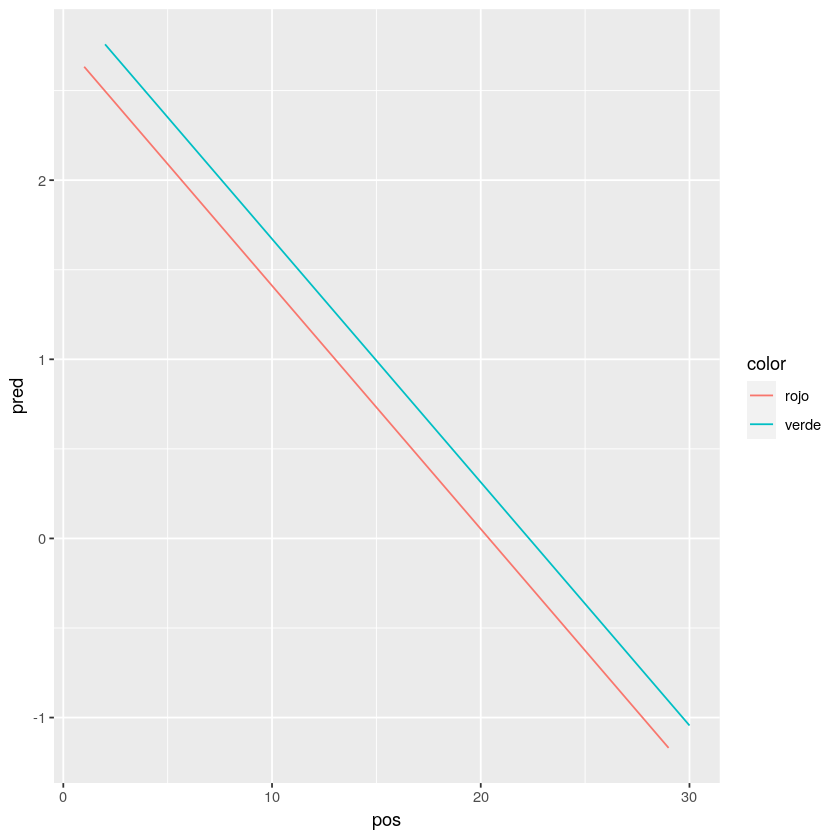

In [164]:
df_test <- data.frame(pos=1:30, color=c("rojo","verde"))
df_test$pred <- predict(model_bola1, df_test)


ggplot(df_test,aes(x=pos, y=pred,color=color))+geom_line()

In [166]:
model_bola2<-lm(df_bola_train, formula=time~pos:color)
summary(model_bola2)


Call:
lm(formula = time ~ pos:color, data = df_bola_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12602 -0.23198 -0.04285  0.21715  0.71888 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.89554    0.09712  29.815  < 2e-16 ***
pos:colorrojo  -0.16317    0.02291  -7.123 3.15e-09 ***
pos:colorverde -0.11271    0.01855  -6.077 1.46e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3733 on 52 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5216,	Adjusted R-squared:  0.5032 
F-statistic: 28.35 on 2 and 52 DF,  p-value: 4.727e-09


In [168]:
caret::postResample(predict(model_bola2, df_bola_test), df_bola_test$time)

RMSE  Rsquared       MAE 
0.3390744 0.7168057 0.2746020

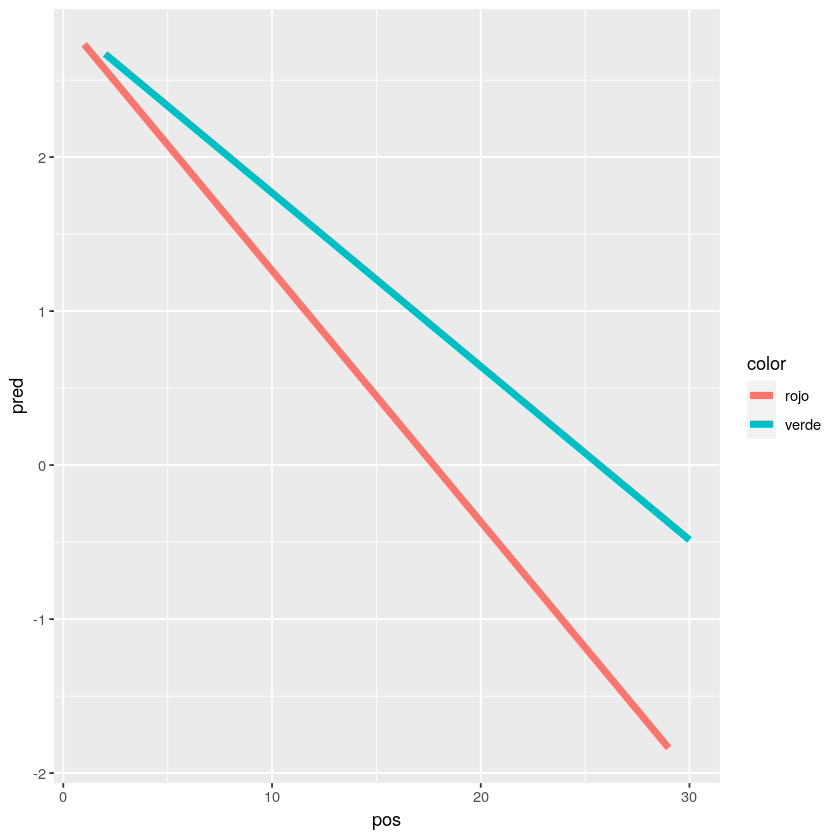

In [169]:
df_test <- data.frame(pos=1:30, color=c("rojo","verde"))
df_test$pred <- predict(model_bola2, df_test)


ggplot(df_test,aes(x=pos, y=pred,color=color))+geom_line(size=2)

In [170]:
model_bola3<-lm(df_bola_train, formula=time~pos*color)
#model_bola1<-lm(df_bola_train, formula=time~pos:color+pos+color)

summary(model_bola3)


Call:
lm(formula = time ~ pos * color, data = df_bola_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09830 -0.22077 -0.04876  0.25020  0.74151 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.83800    0.13362  21.240  < 2e-16 ***
pos            -0.15323    0.02791  -5.490 1.27e-06 ***
colorverde      0.12361    0.19584   0.631    0.531    
pos:colorverde  0.03066    0.03702   0.828    0.411    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3754 on 51 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5253,	Adjusted R-squared:  0.4974 
F-statistic: 18.81 on 3 and 51 DF,  p-value: 2.388e-08


Para la bola roja:
* time = 2.838 - 0.15323*pos

Para la bola verde:
* time = 2.838+0.12361 +( 0.03066-0.15323 )*pos
* time = 2.96161 - 0.12257*pos



In [176]:
caret::postResample(predict(model_bola3, df_bola_test), df_bola_test$time)

RMSE  Rsquared       MAE 
0.3122793 0.7558313 0.2515936

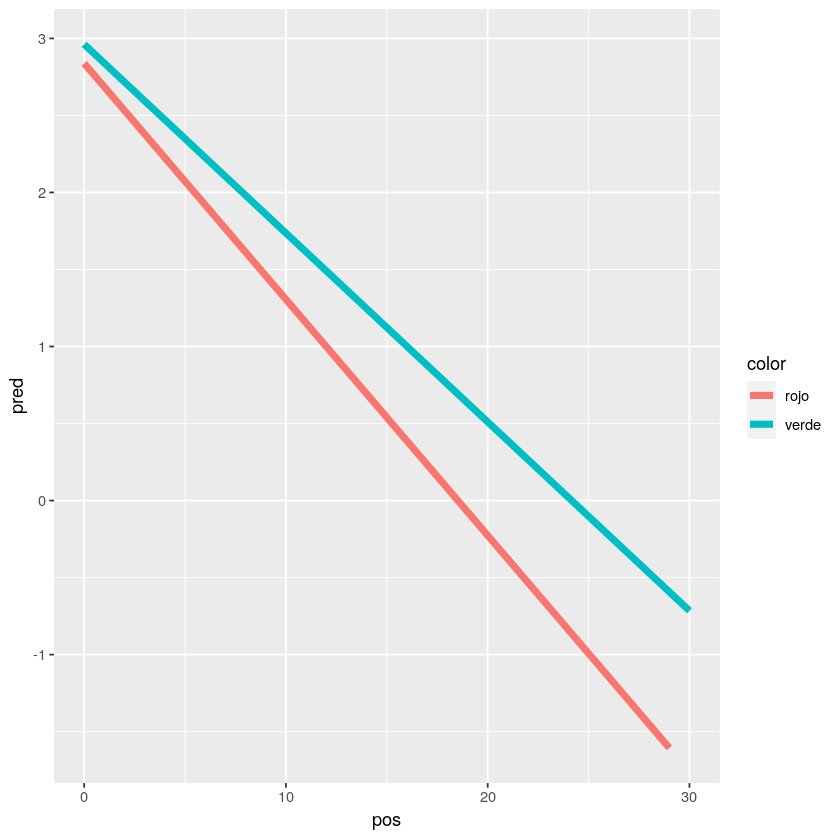

In [175]:
df_test <- data.frame(pos=c(0,0:30), color=c("rojo","verde"))
df_test$pred <- predict(model_bola3, df_test)


ggplot(df_test,aes(x=pos, y=pred,color=color))+geom_line(size=2)

In [178]:
model_bola4<-lm(df_bola_train, formula=time~pos*color+I(pos^2))
summary(model_bola4)


Call:
lm(formula = time ~ pos * color + I(pos^2), data = df_bola_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06603 -0.21088 -0.04367  0.21017  0.71017 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.893948   0.148353  19.507  < 2e-16 ***
pos            -0.199079   0.059310  -3.357  0.00151 ** 
colorverde      0.149727   0.198531   0.754  0.45428    
I(pos^2)        0.005480   0.006251   0.877  0.38487    
pos:colorverde  0.023891   0.037904   0.630  0.53137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3763 on 50 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5325,	Adjusted R-squared:  0.4951 
F-statistic: 14.24 on 4 and 50 DF,  p-value: 7.95e-08


In [179]:
caret::postResample(predict(model_bola4, df_bola_test), df_bola_test$time)

RMSE  Rsquared       MAE 
0.2945258 0.7796566 0.2390860

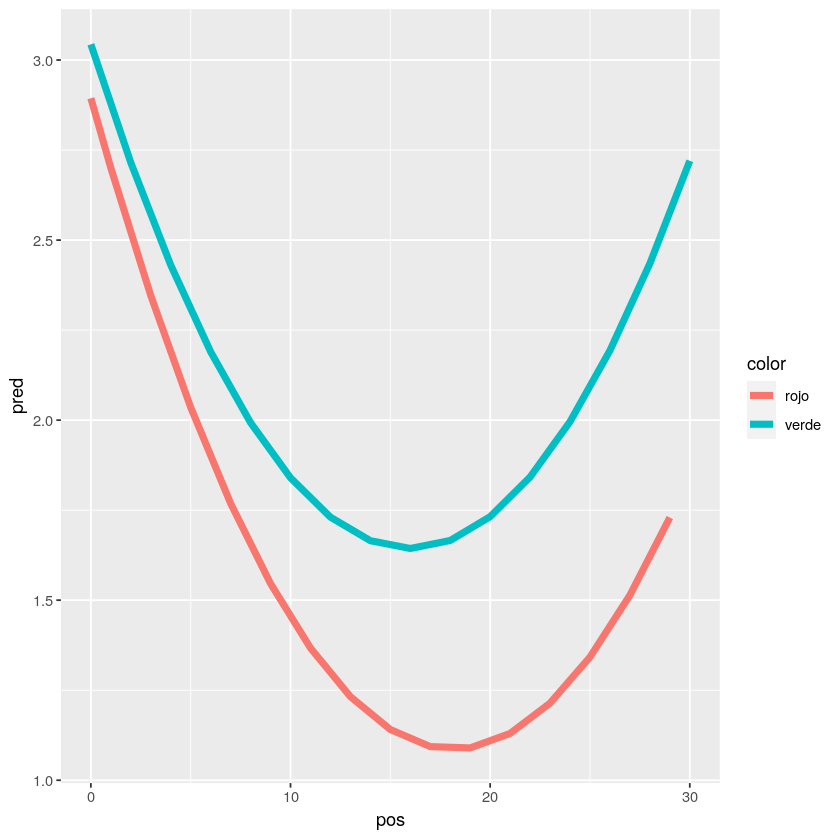

In [180]:
df_test <- data.frame(pos=c(0,0:30), color=c("rojo","verde"))
df_test$pred <- predict(model_bola4, df_test)


ggplot(df_test,aes(x=pos, y=pred,color=color))+geom_line(size=2)